In [1]:
import numpy as np
import matplotlib.pyplot as plt
import odesolver as ode

%pylab inline

Populating the interactive namespace from numpy and matplotlib


**Adapt your RK4 algorithm from PS4 to the two-body equations - the system of equations labeled (4) in the Classical Mechanics Notes. To do this, you’ll have to pull these equations apart into twelve first-order ODEs by rewriting them out in terms of their coordinates, as I show in the Notes.**

**Plug your answers to problem 4(d) on PS11 into these ODEs and integrate them for half a dozen orbits, using at least 1000 timesteps per orbit period. Plot your results in physical space: one point for each star, looking down from above on the plane of the orbit. Turn in a plot and draw a few arrows to show which way each star is going.**

**Does your binary orbit properly? Does the center of mass appear to move? Which way?**

We first define our constants and our equations.

In [2]:
g = 1
m1 = 0.5
m2 = 0.5
def orbit(t, y):
    norm = ((y[0] - y[6])**2 + (y[1] - y[7])**2 + (y[2] - y[8])**2)**(3 / 2)
    diff = y[:3] - y[6:9]
    return np.array([
        y[3],
        y[4],
        y[5],
        -g * m2 * (diff[0] / norm),
        -g * m2 * (diff[1] / norm),
        -g * m2 * (diff[2] / norm),
        y[9],
        y[10],
        y[11],
        -g * m1 * (-diff[0] / norm),
        -g * m1 * (-diff[1] / norm),
        -g * m1 * (-diff[2] / norm)
        ])

def midpoint(points):
    """ Returns midpoint between arbitrary number of points """
    return np.sum(points, axis=0) / len(points)

def plotdata(data, npoints):
    n = len(data)
    plt.style.use('ggplot')
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
    for i in range(npoints):
        # Plot each mass trajectory
        ax.plot(data[:, i * 6], data[:, (i * 6) + 1], label=r'$m{}$'.format(i))
        # Plot Mass labels and lines
        ax.annotate(r'$m{}$'.format(i),
                   xy=(data[-1, i * 6], data[-1, (i * 6) + 1]), xycoords='data',
                   xytext=(data[-1000, i * 6], data[-1000, (i * 6) + 1]), textcoords='data',
                   size=10,
                   arrowprops=dict(arrowstyle='simple',
                                   facecolor='black',
                                   connectionstyle='arc3'))
        ax.scatter([data[-1, i * 6] for i in range(npoints)],
                   [data[-1, (i * 6) + 1] for i in range(npoints)], s=100)
    # Plot midpoint trajectory
    centerline = midpoint([data[:, (i * 6):((i * 6) + 3)] for i in range(npoints)])
    ax.plot(centerline[:, 0], centerline[:, 1], 'k-', label='Center of Mass')
    ax.scatter(centerline[-1, 0], centerline[-1, 1], marker='x', s=100)
    # Legend
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=3, mode="expand", borderaxespad=0.)
    plt.show()

We now define our initial conditions and plot.

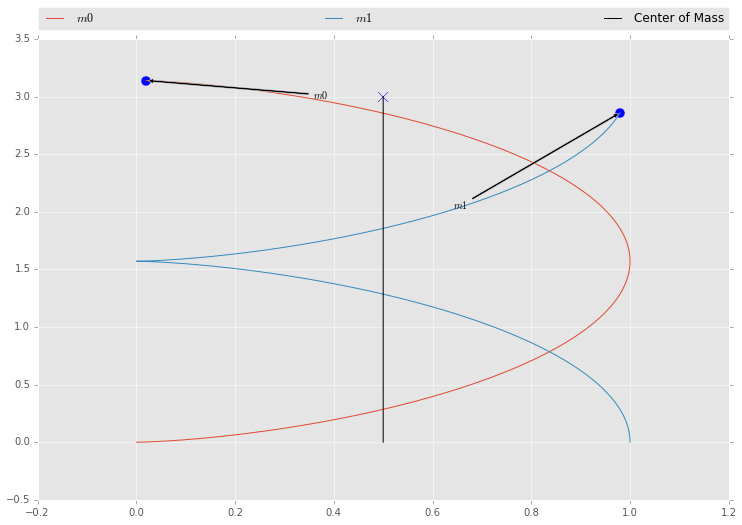

In [3]:
initial_state = np.array([
        0, 0, 0,    # m1 position
        0, 0, 0,    # m1 velocity
        1, 0, 0,    # m2 position
        0, 1, 0     # m2 velocity
        ], dtype=np.float64)

data = ode.mrk4(orbit, 0, initial_state, 0.001, 6000)

plotdata(data, 2)

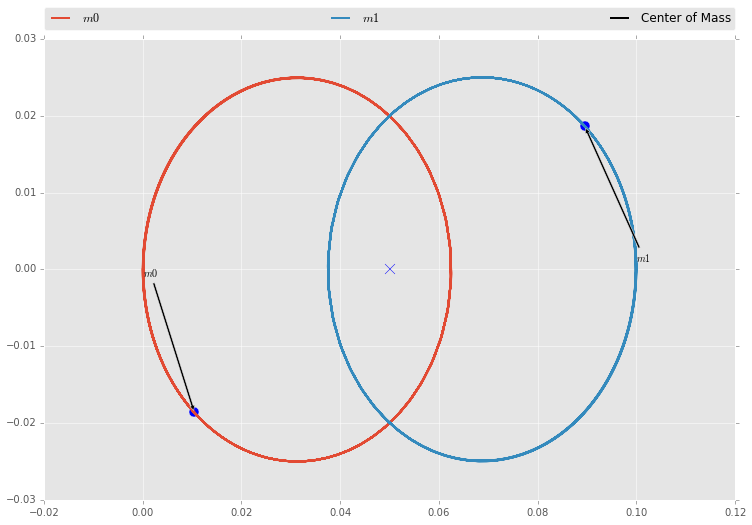

In [83]:
initial_state = np.array([
        0, 0, 0,    # m1 position
        0, -1, 0,    # m1 velocity
        0.1, 0, 0,    # m2 position
        0, 1, 0     # m2 velocity
        ], dtype=np.float64)

data = ode.mrk4(orbit, 0, initial_state, 0.001, 1000)

plotdata(data, 2)

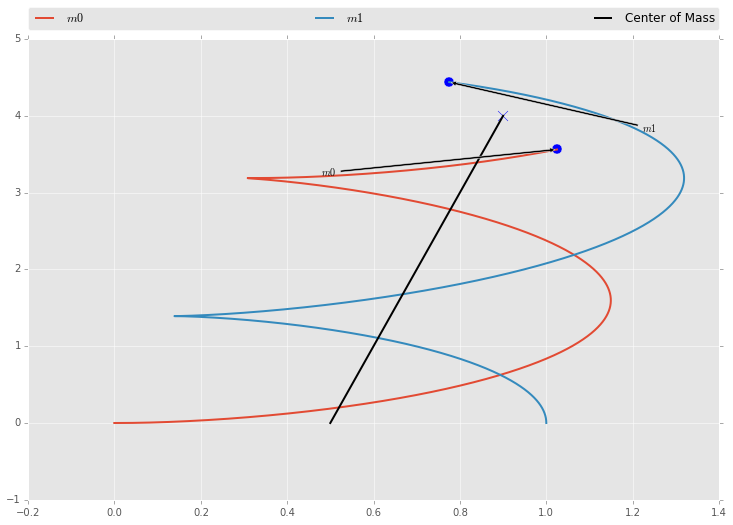

In [86]:
initial_state = np.array([
        0, 0, 0,    # m1 position
        0.1, 0, 0,    # m1 velocity
        1, 0, 0,    # m2 position
        0, 1, 0     # m2 velocity
        ], dtype=np.float64)

data = ode.mrk4(orbit, 0, initial_state, 0.001, 8000)

plotdata(data, 2)

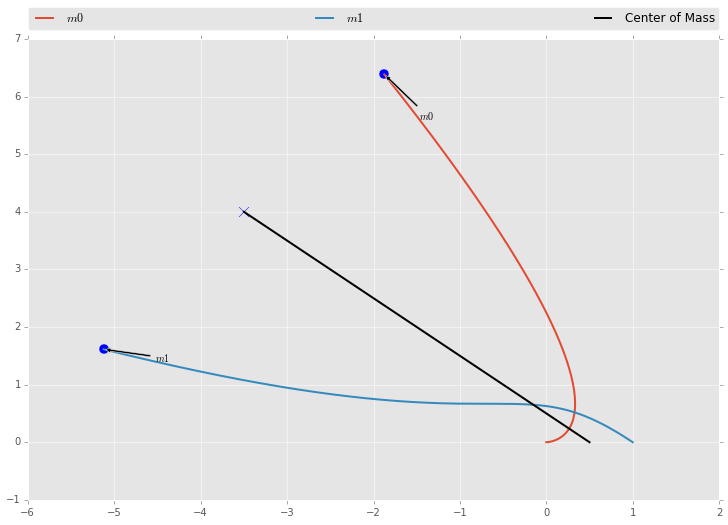

In [88]:
initial_state = np.array([
        0, 0, 0,    # m1 position
        0, 0, 0,    # m1 velocity
        1, 0, 0,    # m2 position
        -1, 1, 0     # m2 velocity
        ], dtype=np.float64)

data = ode.mrk4(orbit, 0, initial_state, 0.001, 8000)

plotdata(data, 2)

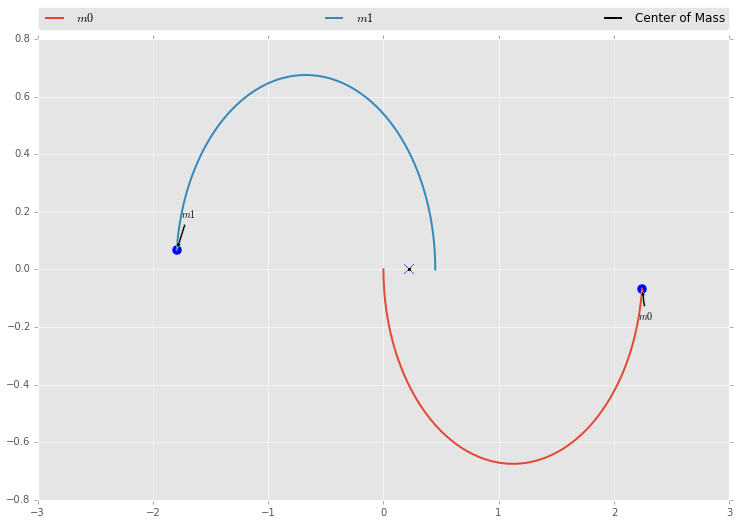

In [89]:
initial_state = np.array([
        0, 0, 0,    # m1 position
        0, -1, 0,    # m1 velocity
        0.45, 0, 0,    # m2 position
        0, 1, 0     # m2 velocity
        ], dtype=np.float64)

data = ode.mrk4(orbit, 0, initial_state, 0.001, 10000)

plotdata(data, 2)

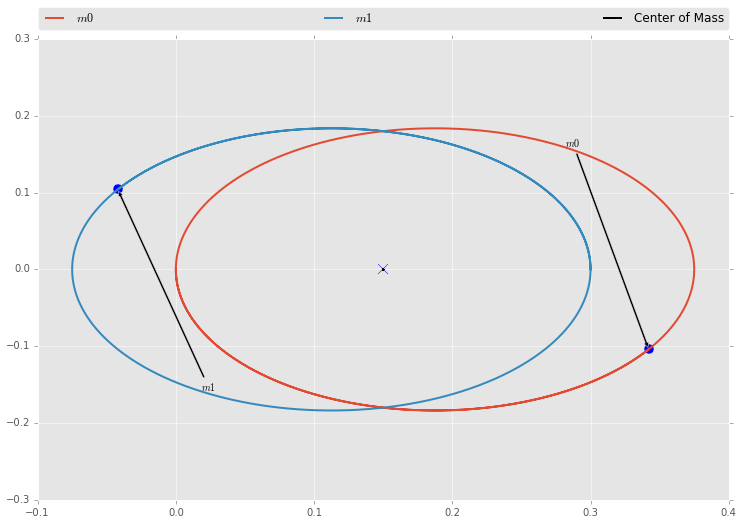

In [90]:
initial_state = np.array([
        0, 0, 0,    # m1 position
        0, -1, 0,    # m1 velocity
        0.3, 0, 0,    # m2 position
        0, 1, 0     # m2 velocity
        ], dtype=np.float64)

data = ode.mrk4(orbit, 0, initial_state, 0.001, 2000)

plotdata(data, 2)

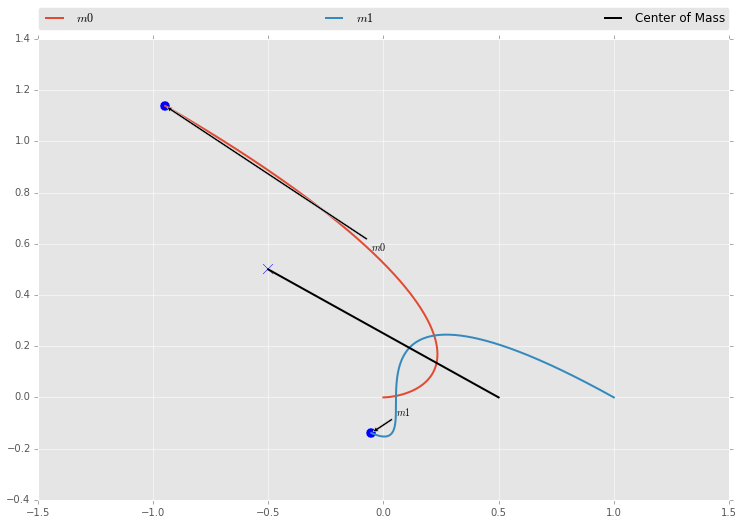

In [91]:
initial_state = np.array([
        0, 0, 0,    # m1 position
        0, 0, 0,    # m1 velocity
        1, 0, 0,    # m2 position
        -1, 0.5, 0     # m2 velocity
        ], dtype=np.float64)

data = ode.mrk4(orbit, 0, initial_state, 0.001, 2000)

plotdata(data, 2)

After some rudimentary testing our binary system does appear to orbit properly, and the center of mass of the system moves with the system. I've shown this by creating a line that is the midpoint of the system for every tick.

##Appendix: Benchmarking (Personal Use)

In [9]:
initial_state = np.array([
        0, 0, 0,    # m1 position
        0.1, 0, 0,    # m1 velocity
        1, 0, 0,    # m2 position
        0, 1, 0     # m2 velocity
        ], dtype=np.float64)

%timeit -n3 -r10 ps5lib.mrk4(orbit, 0, initial_state, 0.001, 1000)
%timeit -n3 -r10 ode_dep.mrk4(orbit, 0, initial_state, 0.001, 1000)
%timeit -n3 -r10 odejit.mrk4(orbit, 0, initial_state, 0.001, 1000)

3 loops, best of 10: 45.2 ms per loop
3 loops, best of 10: 44.5 ms per loop
3 loops, best of 10: 60.9 ms per loop
